In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
import preprocessing_time_series as pts


os.chdir(pts.working_dir())

Populating the interactive namespace from numpy and matplotlib


``` bash
sudo python preprocessing_time_series.py
```

In [2]:
data_train = pd.read_csv('Feature_releases/release_v01/train_NAYARIT.csv')
print(data_train.shape)
data_train.head()

(809684, 24)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,No_remains,Venta_hoy_by_uni,Ordered,Log_Demanda,Median_Producto_ID,LogMean_Producto_ID,Median_Producto_ID_Ruta_SAK,LogMean_Producto_ID_Ruta_SAK,Median_Producto_ID_Cliente_ID_Agencia_ID,LogMean_Producto_ID_Cliente_ID_Agencia_ID
0,3,1340,1,1051,41849,73,1,21.32,0,0.0,...,0,21.32,1,0.693147,2.0,1.118843,2.0,1.122955,1.0,0.774240
1,3,1340,1,1051,41849,1109,6,90.06,0,0.0,...,0,15.01,1,1.945910,2.0,1.171162,3.0,1.416386,6.0,1.805732
2,3,1340,1,1051,41849,1125,13,124.80,0,0.0,...,0,9.60,1,2.639057,6.0,1.971653,6.0,2.024443,9.5,2.042122
3,3,1340,1,1051,41849,1150,1,13.96,0,0.0,...,0,13.96,1,0.693147,2.0,1.448213,2.5,1.471629,2.0,1.080011
4,3,1340,1,1051,41849,2233,4,79.76,0,0.0,...,0,19.94,1,1.609438,3.0,1.409244,3.0,1.517772,3.0,1.399732


In [5]:
town = pts.text_encoding(pts.town_preproc())
agencies = set(town.loc[town.State == u'NAYARIT'].index)
len(agencies)

Data endoded


10

In [6]:
data_test = pd.read_csv('test.csv', index_col=0)
data_test = data_test.loc[data_test.Agencia_ID.isin(agencies), :]
print(data_test.shape)
data_test.head()

(78819, 6)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
id,,,,,,
42,11,1378,1,2005,594640,43285
59,10,1359,11,3957,2068213,6469
129,10,1378,1,2101,905734,37577
183,11,1340,1,2065,325592,43285
203,11,1340,1,2052,7729188,43274


In [7]:
data = pd.concat([data_train, data_test], axis=0)
del data_train
del data_test

In [8]:
data = pts.lag_generation(data, n_lags=5)
data = data.drop([u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered',u'Median_Producto_ID',
       u'LogMean_Producto_ID', u'Median_Producto_ID_Ruta_SAK',
       u'LogMean_Producto_ID_Ruta_SAK',
       u'Median_Producto_ID_Cliente_ID_Agencia_ID',
       u'LogMean_Producto_ID_Cliente_ID_Agencia_ID'], axis=1).set_index(u'Semana')
data.describe().transpose()

1 lag done
2 lag done
3 lag done
4 lag done
5 lag done


//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Agencia_ID,888503.0,1.431630e+03,2.073537e+02,1340.000000,1340.0,1340.0,1378.0,1.990000e+03
Canal_ID,888503.0,1.308903e+00,1.488742e+00,1.000000,1.0,1.0,1.0,1.100000e+01
Cliente_ID,888503.0,1.868296e+06,1.818308e+06,14651.000000,362908.0,1208571.0,2386979.0,9.787404e+06
Log_Demanda,809684.0,1.621163e+00,8.314462e-01,0.000000,NaN,NaN,NaN,8.045909e+00
Producto_ID,888503.0,1.836241e+04,1.875427e+04,73.000000,1240.0,3270.0,37159.0,4.992800e+04
Ruta_SAK,888503.0,2.093344e+03,1.723202e+03,900.000000,1165.0,1261.0,2103.0,8.056000e+03
Venta_uni_hoy_1,489378.0,8.174146e+00,1.592359e+01,0.000000,NaN,NaN,NaN,1.434000e+03
Venta_hoy_1,489378.0,7.176713e+01,2.075304e+02,0.000000,NaN,NaN,NaN,1.549683e+04
Dev_uni_proxima_1,489378.0,7.131297e-02,1.824270e+00,0.000000,NaN,NaN,NaN,3.460000e+02
Dev_proxima_1,489378.0,7.170916e-01,1.610642e+01,0.000000,NaN,NaN,NaN,2.982520e+03


In [9]:
X_train = data.loc[~data.Log_Demanda.isnull(),:].drop('Log_Demanda', axis=1)
y_train = data.loc[~data.Log_Demanda.isnull(),'Log_Demanda']
X_eval = data.loc[data.Log_Demanda.isnull(),:]

In [11]:
import crossval

cv5fold, strats = crossval.crossvalidation(X_train[['Canal_ID']])
strats.value_counts()

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


1     761186
4      27504
11     16058
2       4646
5        286
6          4
dtype: int64

# Random Forest

In [12]:
def plot_feature_importances(rf, feat_labels): 
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(15, 9))
    plt.title('RF Feature Importances')
    plt.bar(range(len(feat_labels)), 
            importances[indices],
            color='lightblue', 
            align='center')


    plt.xticks(range(len(feat_labels)), feat_labels[indices], rotation=90)
    plt.xlim([-1, len(feat_labels)])
    plt.tight_layout()
#     plt.savefig('./rf_feature_importance.png', dpi=300)
    plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
rf = RandomForestRegressor(n_estimators=3, criterion='mse', n_jobs=-1, verbose=10)

scores = cross_val_score(rf, X_train.fillna(-999), 
                         y_train,
                scoring = 'mean_squared_error', cv = cv5fold, n_jobs=-1)
rf.fit(X_train.fillna(-999), y_train)

 building tree 3 of 3
 building tree 2 of 3
building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3
building tree 1 of 3
 building tree 2 of 3
building tree 1 of 3
 building tree 3 of 3
building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.6min remaining:  -24.2s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.6min remaining:  -24.4s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.7min remaining:  -24.9s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.7min remaining:  -25.1s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.7min remaining:  -25.5s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.3s remaining:   -0.1s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s fi

building tree 1 of 3
 building tree 2 of 3
 building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.8min remaining:  -27.3s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:  1.8min remaining:  -27.4s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   30.9s remaining:   -7.7s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   31.1s remaining:   -7.8s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.1s finished
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.2s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.2s remaining:   -0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.2s finished


building tree 1 of 3building tree 2 of 3

building tree 3 of 3


[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   37.9s remaining:   -9.5s
[Parallel(n_jobs=-1)]: Done   4 out of   3 | elapsed:   37.9s remaining:   -9.5s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3, n_jobs=-1, oob_score=False, random_state=None,
           verbose=10, warm_start=False)

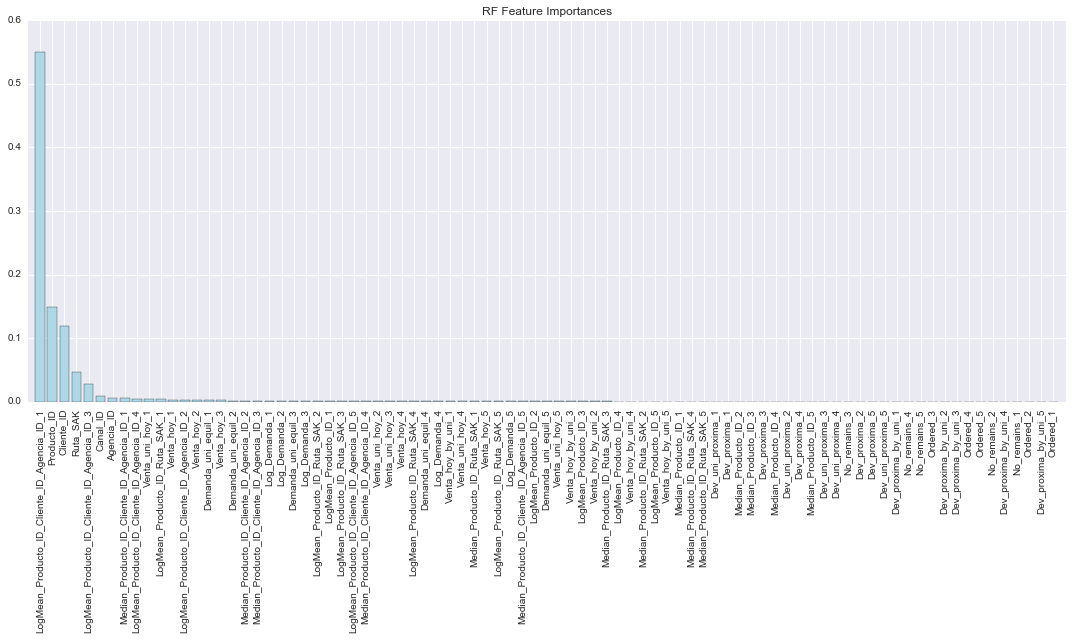

[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.6s remaining:   -0.2s
[Parallel(n_jobs=3)]: Done   4 out of   3 | elapsed:    0.6s remaining:   -0.2s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.6s finished


[-0.42592437 -0.22077094 -0.19162746 -0.19152002 -0.24840507] 0.236259831168


In [17]:
plot_feature_importances(rf, X_train.columns)
r2 = rf.score(X_train.fillna(-999), 
        y_train)

rmse = np.sqrt((1-r2)*y_train.var())
print (scores, rmse)

In [18]:
X_eval.describe()

,Agencia_ID,Canal_ID,Cliente_ID,Log_Demanda,Producto_ID,Ruta_SAK,Venta_uni_hoy_1,Venta_hoy_1,Dev_uni_proxima_1,Dev_proxima_1,...,No_remains_5,Venta_hoy_by_uni_5,Ordered_5,Log_Demanda_5,Median_Producto_ID_5,LogMean_Producto_ID_5,Median_Producto_ID_Ruta_SAK_5,LogMean_Producto_ID_Ruta_SAK_5,Median_Producto_ID_Cliente_ID_Agencia_ID_5,LogMean_Producto_ID_Cliente_ID_Agencia_ID_5
count,78819.000000,78819.000000,7.881900e+04,0.0,78819.000000,78819.000000,26830.000000,26830.000000,26830.000000,26830.000000,...,31986.000000,31962.000000,31986.000000,31986.000000,31986.000000,31986.000000,31986.000000,31986.000000,31986.000000,31986.000000
mean,1431.419962,1.324275,1.886317e+06,NaN,20010.414760,2133.904021,7.797391,70.269130,0.055758,0.529477,...,0.020915,11.109523,0.999250,1.804217,5.986791,1.670353,6.628025,1.700724,8.905490,1.801864
std,207.258236,1.524034,1.826762e+06,NaN,18973.104248,1769.635854,18.224803,213.992543,0.975960,8.198948,...,0.143103,6.262946,0.027382,0.908731,11.475688,0.635778,13.838636,0.686644,16.560353,0.827504
min,1340.000000,1.000000,1.465100e+04,NaN,73.000000,1010.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.000000,0.825303,0.000000,0.000000,0.000000,0.000000
25%,1340.000000,1.000000,3.649775e+05,NaN,1240.000000,1167.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1340.000000,1.000000,1.220032e+06,NaN,6469.000000,1262.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1378.000000,1.000000,2.398657e+06,NaN,40930.000000,2104.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1990.000000,11.000000,9.787404e+06,NaN,49860.000000,8056.000000,1434.000000,12361.080000,78.000000,672.360000,...,1.000000,148.500000,1.000000,6.790097,888.000000,6.709733,888.000000,6.709733,888.000000,6.709733
